In [6]:
import sys 
sys.path.insert(0, "..")
from multiwarp_dataloader import FocalstackLoader
from custom_transforms import ArrayToTensor
import matplotlib.pyplot as plt
from ipywidgets import interact

loader = FocalstackLoader("/home/joseph/Documents/thesis/epidata/module-1-1/module1-1-png/", 
                          cameras=[0], fs_num_cameras=9, fs_num_planes=9, gray=True, transform=ArrayToTensor())

y = loader[0]["tgt_lf_formatted"]

def show_fs(plane):
    plt.imshow(y[plane, :, :], 'gray')
    plt.show()


interact(show_fs, plane=(0, 8, 1))

interactive(children=(IntSlider(value=4, description='plane', max=8), Output()), _dom_classes=('widget-interac…

<function __main__.show_fs(plane)>

torch.Size([128, 8, 128])
torch.Size([128, 128])


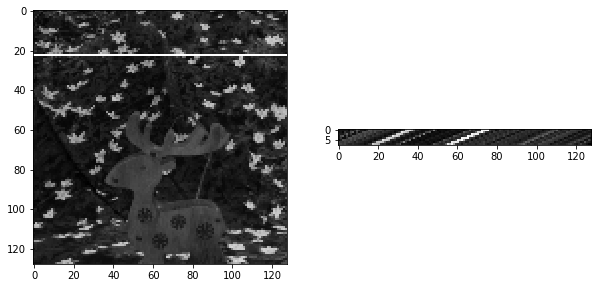

In [48]:
from multiwarp_dataloader import EPILoader
import torch

loader = EPILoader("/home/joseph/Documents/thesis/epidata/module-1-1/module1-1-png/", 
                   cameras=[0], gray=True, transform=ArrayToTensor())

y = loader[0]["tgt_lf_formatted"]


def show_epi(plane):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(121)
    print(y.shape)
    img = torch.clone(y).permute(1,0,2)[0, :, :]
    print(img.shape)
    img[plane, :] = 1
    ax.imshow(img, 'gray')
    ax = fig.add_subplot(122)
    ax.imshow(y[plane, :, :], 'gray')
    
# interact(show_epi, plane=(0, 128, 1))
show_epi(22)